<a href="https://colab.research.google.com/github/afortuny/DeepLearningFastAI/blob/main/13_language_model_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [5]:
#hide
from fastbook import *
from IPython.display import display,HTML

# Music model from scratch

In [6]:
!pip install music21
!apt-get install -y lilypond

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  fonts-droid-fallback fonts-lmodern fonts-noto-mono ghostscript gsfonts
  libauthen-sasl-perl libcupsfilters1 libcupsimage2 libdata-dump-perl
  libencode-locale-perl libfile-listing-perl libfont-afm-perl libgs9
  libgs9-common libhtml-form-perl libhtml-format-perl libhtml-parser-perl
  libhtml-tagset-perl libhtml-tree-perl libhttp-cookies-perl
  libhttp-daemon-perl libhttp-date-perl libhttp-message-perl
  libhttp-negotiate-perl libijs-0.35 libio-html-perl libio-socket-ssl-perl
  libjbig2dec0 libkpathsea6 liblwp-mediatypes-perl liblwp-protocol-https-perl
  libmailtools-perl libnet-http-perl libnet-smtp-ssl-per

In [7]:
#Importing Libraries
import numpy as np 
import pandas as pd 
from collections import Counter
import random
import IPython
from IPython.display import Image, Audio
import music21
from music21 import *
import matplotlib.pyplot as plt 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline
import sys
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")
np.random.seed(42)

In [9]:
#install pyDF2
!pip install PyPDF2

# importing all the required modules
import PyPDF2

# creating an object 
file = open('/content/gdrive/MyDrive/lorca/libro_de_poemas.pdf', 'rb')

# creating a pdf reader object
fileReader = PyPDF2.PdfFileReader(file)

# print the number of pages in pdf file
print(fileReader.numPages)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 214 kB 4.0 MB/s 
137


In [10]:
fileReader

In [ ]:
#Loading the list of chopin's midi files as stream 
filepath = "/content/gdrive/MyDrive/Music/chopin"
#Getting midi files
all_midis= []
for i in os.listdir(filepath):
    if i.endswith(".mid"):
        tr = filepath+'/'+i
        midi = converter.parse(tr)
        all_midis.append(midi)

In [ ]:
all_midis

[<music21.stream.Score 0x7fbb2a94b890>,
 <music21.stream.Score 0x7fbb2a489dd0>,
 <music21.stream.Score 0x7fbb27c6ead0>,
 <music21.stream.Score 0x7fbb26f07e50>,
 <music21.stream.Score 0x7fbb28035410>,
 <music21.stream.Score 0x7fbb26411e10>,
 <music21.stream.Score 0x7fbb2695bb10>,
 <music21.stream.Score 0x7fbb296bccd0>,
 <music21.stream.Score 0x7fbb23e354d0>,
 <music21.stream.Score 0x7fbb27a005d0>,
 <music21.stream.Score 0x7fbb22c02a90>,
 <music21.stream.Score 0x7fbb23f8b050>,
 <music21.stream.Score 0x7fbb25869fd0>,
 <music21.stream.Score 0x7fbb22ce9190>,
 <music21.stream.Score 0x7fbb22a37250>,
 <music21.stream.Score 0x7fbb28b66190>,
 <music21.stream.Score 0x7fbb277843d0>,
 <music21.stream.Score 0x7fbb22bdfe10>,
 <music21.stream.Score 0x7fbb20a8ea10>,
 <music21.stream.Score 0x7fbb22a018d0>,
 <music21.stream.Score 0x7fbb22952e10>,
 <music21.stream.Score 0x7fbb206cdd90>,
 <music21.stream.Score 0x7fbb221c2f90>,
 <music21.stream.Score 0x7fbb21e52e50>,
 <music21.stream.Score 0x7fbb2059ba10>,


In [ ]:
#Helping function        
def extract_notes(file):
    notes = []
    pick = None
    for j in file:
        songs = instrument.partitionByInstrument(j)
        for part in songs.parts:
            pick = part.recurse()
            for element in pick:
                if isinstance(element, note.Note):
                    notes.append(str(element.pitch))
                elif isinstance(element, chord.Chord):
                    notes.append(".".join(str(n) for n in element.normalOrder))

    return notes
#Getting the list of notes as Corpus
Corpus= extract_notes(all_midis)
print("Total notes in all the Chopin midis in the dataset:", len(Corpus))

Total notes in all the Chopin midis in the dataset: 63429


In [ ]:
from fastai.text.all import *

In [ ]:
len(Corpus)

63429

In [ ]:
text = ' . '.join([l.strip() for l in Corpus])
text[:100]

'B3 . 4.8 . E2 . B2 . 4.8 . B3 . 3.6 . B1 . B2 . 3.6 . B3 . B3 . 4.8 . E2 . B2 . 4.8 . C#4 . 4.9 . A2'

In [ ]:
text = text.replace('.','')

In [ ]:
tokens = text.split(' ')
tokens[:10]

['B3', '', '48', '', 'E2', '', 'B2', '', '48', '']

In [ ]:
vocab = L(*tokens).unique()

In [ ]:
len(vocab)

318

In [ ]:
seql = 40

In [ ]:
test_list =  tokens
odd_i = []
even_i = []
for i in range(0, len(test_list)):
    if i % 2:
        even_i.append(test_list[i])
    else :
        odd_i.append(test_list[i])
 
tokens = odd_i

In [ ]:
word2idx = {w:i for i,w in enumerate(vocab)}
nums = L(word2idx[i] for i in tokens)
nums

(#63429) [0,2,3,4,2,0,5,6,4,5...]

In [ ]:
seqs = L((tensor(nums[i:i+seql]), nums[i+seql]) for i in range(0,len(nums)-seql-1,seql))
seqs

(#1585) [(tensor([ 0,  2,  3,  4,  2,  0,  5,  6,  4,  5,  0,  0,  2,  3,  4,  2,  7,  8,  9, 10,  8, 11,  7, 12, 13, 10, 12, 14, 12, 10, 12, 14, 14, 15,  6, 16, 15, 14, 17,  4]), 16),(tensor([16, 17,  4, 18, 17, 19, 20, 17, 18, 21,  9, 20, 21, 18,  9, 18, 15,  6, 20, 15, 14, 15, 22, 23, 23, 23, 16, 23, 23, 23, 15, 23, 23, 14, 23, 14, 17, 22, 19, 20]), 17),(tensor([17, 14, 24, 13, 20, 24,  7, 13,  7, 12, 25, 10, 12,  7, 12, 26, 27, 27, 27,  4, 27, 27, 27, 12, 27, 27,  0, 28,  0,  2, 29,  3,  4,  2,  0,  5,  6,  4,  5,  0]), 0),(tensor([ 0, 30, 31,  4, 30,  0, 30, 32,  4, 30,  0, 33, 34, 35, 36, 35, 37, 38, 39, 40, 38, 18, 38, 41, 20, 38, 18, 42, 43, 20, 42, 18, 44, 18, 45, 46, 20, 45, 18, 47]), 48),(tensor([48, 20, 47, 18, 48, 49, 47, 50, 51, 47, 52, 47, 53, 35, 47, 54, 55, 56, 16, 14, 55, 14, 42, 16, 38,  7, 34, 57, 58, 16, 57,  0,  0, 59,  6,  4, 60,  0,  0,  2]), 53),(tensor([53,  4,  2,  0,  5,  6,  4,  5,  0,  0,  2,  3,  4,  2, 34,  8, 46, 36,  8, 46, 34, 61, 50, 36, 61, 34, 62, 

In [ ]:
bs = 64
cut = int(len(seqs) * 0.8)
dls = DataLoaders.from_dsets(seqs[:cut], seqs[cut:], bs=64, shuffle=False)

In [ ]:
class LMModel2(Module):
    def __init__(self, vocab_sz, n_hidden):
        self.i_h = nn.Embedding(vocab_sz, n_hidden)  
        self.h_h = nn.Linear(n_hidden, n_hidden)     
        self.h_o = nn.Linear(n_hidden,vocab_sz)
        
    def forward(self, x):
        h = 0
        for i in range(seql):
            h = h + self.i_h(x[:,i])
            h = F.relu(self.h_h(h))
        return self.h_o(h)

In [ ]:
learn = Learner(dls, LMModel2(len(vocab), 32), loss_func=F.cross_entropy, 
                metrics=accuracy)
learn.fit_one_cycle(100, 1e-4)

epoch,train_loss,valid_loss,accuracy,time
0,5.758044,5.731402,0.000000,00:01
1,5.757600,5.730802,0.000000,00:00
2,5.757042,5.730019,0.000000,00:00
3,5.756302,5.728964,0.000000,00:00
4,5.755302,5.727552,0.000000,00:01
5,5.753961,5.725704,0.000000,00:00
6,5.752194,5.723350,0.000000,00:00
7,5.749916,5.720430,0.000000,00:00
8,5.747045,5.716889,0.003155,00:00
9,5.743503,5.712689,0.003155,00:00


In [ ]:
class LMModel3(Module):
    def __init__(self, vocab_sz, n_hidden):
        self.i_h = nn.Embedding(vocab_sz, n_hidden)  
        self.h_h = nn.Linear(n_hidden, n_hidden)     
        self.h_o = nn.Linear(n_hidden,vocab_sz)
        self.h = 0
        
    def forward(self, x):
        for i in range(seql):
            self.h = self.h + self.i_h(x[:,i])
            self.h = F.relu(self.h_h(self.h))
        out = self.h_o(self.h)
        self.h = self.h.detach()
        return out
    
    def reset(self): self.h = 0

In [ ]:
m = len(seqs)//bs
m,bs,len(seqs)

(24, 64, 1585)

In [ ]:
def group_chunks(ds, bs):
    m = len(ds) // bs
    new_ds = L()
    for i in range(m): new_ds += L(ds[i + m*j] for j in range(bs))
    return new_ds

In [ ]:
cut = int(len(seqs) * 0.8)
dls = DataLoaders.from_dsets(
    group_chunks(seqs[:cut], bs), 
    group_chunks(seqs[cut:], bs), 
    bs=bs, drop_last=True, shuffle=False)

In [ ]:
learn = Learner(dls, LMModel3(len(vocab), 64), loss_func=F.cross_entropy,
                metrics=accuracy, cbs=ModelResetter)
learn.fit_one_cycle(100, 3e-3)

epoch,train_loss,valid_loss,accuracy,time
0,5.802680,5.820603,0.007812,00:00
1,5.770678,5.779432,0.007812,00:00
2,5.731380,5.727895,0.019531,00:00
3,5.679253,5.658276,0.019531,00:00
4,5.605284,5.552905,0.031250,00:00
5,5.484064,5.337351,0.011719,00:00
6,5.252738,5.080058,0.031250,00:00
7,5.007535,4.977760,0.019531,00:00
8,4.793182,4.961291,0.019531,00:00
9,4.609800,4.969020,0.027344,00:00


In [ ]:
sl = 40
seqs = L((tensor(nums[i:i+sl]), tensor(nums[i+1:i+sl+1]))
         for i in range(0,len(nums)-sl-1,sl))
cut = int(len(seqs) * 0.8)
dls = DataLoaders.from_dsets(group_chunks(seqs[:cut], bs),
                             group_chunks(seqs[cut:], bs),
                             bs=bs, drop_last=True, shuffle=False)

In [ ]:
class LMModel4(Module):
    def __init__(self, vocab_sz, n_hidden):
        self.i_h = nn.Embedding(vocab_sz, n_hidden)  
        self.h_h = nn.Linear(n_hidden, n_hidden)     
        self.h_o = nn.Linear(n_hidden,vocab_sz)
        self.h = 0
        
    def forward(self, x):
        outs = []
        for i in range(sl):
            self.h = self.h + self.i_h(x[:,i])
            self.h = F.relu(self.h_h(self.h))
            outs.append(self.h_o(self.h))
        self.h = self.h.detach()
        return torch.stack(outs, dim=1)
    
    def reset(self): self.h = 0

In [ ]:
def loss_func(inp, targ):
    return F.cross_entropy(inp.view(-1, len(vocab)), targ.view(-1))

In [ ]:
learn = Learner(dls, LMModel4(len(vocab), 64), loss_func=loss_func,
                metrics=accuracy, cbs=ModelResetter)
learn.fit_one_cycle(15, 3e-3)

epoch,train_loss,valid_loss,accuracy,time
0,5.774791,5.715564,0.008887,00:01
1,5.616256,5.226553,0.013086,00:01
2,5.218638,4.944570,0.015918,00:01
3,4.930194,4.901433,0.021289,00:01
4,4.711557,4.834106,0.029492,00:01
5,4.517467,4.751228,0.039551,00:01
6,4.337302,4.681598,0.047852,00:01
7,4.184734,4.645731,0.053320,00:01
8,4.060422,4.641064,0.052637,00:01
9,3.955066,4.631229,0.058789,00:01


In [ ]:
class LMModel5(Module):
    def __init__(self, vocab_sz, n_hidden, n_layers):
        self.i_h = nn.Embedding(vocab_sz, n_hidden)
        self.rnn = nn.RNN(n_hidden, n_hidden, n_layers, batch_first=True)
        self.h_o = nn.Linear(n_hidden, vocab_sz)
        self.h = torch.zeros(n_layers, bs, n_hidden)
        
    def forward(self, x):
        res,h = self.rnn(self.i_h(x), self.h)
        self.h = h.detach()
        return self.h_o(res)
    
    def reset(self): self.h.zero_()

In [ ]:
learn = Learner(dls, LMModel5(len(vocab), 64, 2), 
                loss_func=CrossEntropyLossFlat(), 
                metrics=accuracy, cbs=ModelResetter)
learn.fit_one_cycle(15, 3e-3)

epoch,train_loss,valid_loss,accuracy,time
0,5.739223,5.695117,0.013574,00:00
1,5.486116,5.038331,0.008496,00:00
2,5.134515,4.959859,0.010742,00:00
3,4.933986,4.863515,0.017676,00:00
4,4.751478,4.674753,0.050098,00:00
5,4.571054,4.595477,0.042090,00:00
6,4.407166,4.556748,0.047266,00:01
7,4.262514,4.533320,0.045801,00:00
8,4.137773,4.530185,0.053418,00:00
9,4.032480,4.530549,0.057031,00:00


In [ ]:
class LMModel6(Module):
    def __init__(self, vocab_sz, n_hidden, n_layers):
        self.i_h = nn.Embedding(vocab_sz, n_hidden)
        self.rnn = nn.LSTM(n_hidden, n_hidden, n_layers, batch_first=True)
        self.h_o = nn.Linear(n_hidden, vocab_sz)
        self.h = [torch.zeros(n_layers, bs, n_hidden) for _ in range(2)]
        
    def forward(self, x):
        res,h = self.rnn(self.i_h(x), self.h)
        self.h = [h_.detach() for h_ in h]
        return self.h_o(res)
    
    def reset(self): 
        for h in self.h: h.zero_()

In [ ]:
learn = Learner(dls, LMModel6(len(vocab), 64, 2), 
                loss_func=CrossEntropyLossFlat(), 
                metrics=accuracy, cbs=ModelResetter)
learn.fit_one_cycle(15, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,5.712502,5.621532,0.007227,00:01
1,5.254794,4.974936,0.008496,00:01
2,4.974211,4.815873,0.018555,00:01
3,4.722727,4.680264,0.040234,00:01
4,4.507590,4.612427,0.044531,00:01
5,4.326954,4.504009,0.054395,00:01
6,4.164571,4.442678,0.058789,00:01
7,4.014821,4.405218,0.069336,00:02
8,3.879512,4.394965,0.065918,00:01
9,3.759409,4.394902,0.073633,00:01


In [ ]:
class Dropout(Module):
    def __init__(self, p): self.p = p
    def forward(self, x):
        if not self.training: return x
        mask = x.new(*x.shape).bernoulli_(1-p)
        return x * mask.div_(1-p)

In [ ]:
class LMModel7(Module):
    def __init__(self, vocab_sz, n_hidden, n_layers, p):
        self.i_h = nn.Embedding(vocab_sz, n_hidden)
        self.rnn = nn.LSTM(n_hidden, n_hidden, n_layers, batch_first=True)
        self.drop = nn.Dropout(p)
        self.h_o = nn.Linear(n_hidden, vocab_sz)
        self.h_o.weight = self.i_h.weight
        self.h = [torch.zeros(n_layers, bs, n_hidden) for _ in range(2)]
        
    def forward(self, x):
        raw,h = self.rnn(self.i_h(x), self.h)
        out = self.drop(raw)
        self.h = [h_.detach() for h_ in h]
        return self.h_o(out),raw,out
    
    def reset(self): 
        for h in self.h: h.zero_()

In [ ]:
learn = TextLearner(dls, LMModel7(len(vocab), 64, 2, 0.4),
                    loss_func=CrossEntropyLossFlat(), metrics=accuracy)

In [ ]:
learn.fit_one_cycle(15, 1e-3, wd=0.1)

epoch,train_loss,valid_loss,accuracy,time
0,5.951024,5.884311,0.002637,00:01
1,5.877833,5.736911,0.005176,00:01
2,5.747097,5.491854,0.018262,00:01
3,5.580051,5.238776,0.047852,00:01
4,5.407897,5.048778,0.065234,00:01
5,5.246848,4.933387,0.068945,00:01
6,5.102314,4.840322,0.069629,00:01
7,4.978809,4.776802,0.067871,00:01
8,4.870435,4.734711,0.067969,00:01
9,4.780921,4.708007,0.071582,00:01


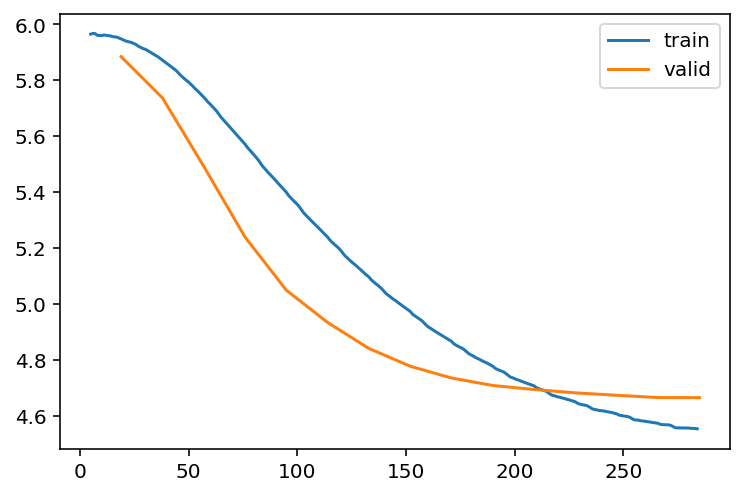

In [ ]:
learn.recorder.plot_loss()